### Recurrent neural net

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading dataset
ibm_stock = pd.read_csv('IBM.csv')

In [3]:
ibm_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-04-30,206.710007,207.960007,206.320007,207.080002,171.139999,2773200
1,2012-05-01,207.179993,208.929993,206.710007,208.000000,171.900360,2715900
2,2012-05-02,206.970001,208.270004,206.910004,208.059998,171.949890,2360300
3,2012-05-03,208.270004,208.919998,206.550003,207.240005,171.272232,2826600
4,2012-05-04,206.470001,207.110001,204.399994,204.990005,169.412750,4023600


In [4]:
ibm_stock.shape

(1509, 7)

In [5]:
ibm_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 7 columns):
Date         1509 non-null object
Open         1509 non-null float64
High         1509 non-null float64
Low          1509 non-null float64
Close        1509 non-null float64
Adj Close    1509 non-null float64
Volume       1509 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 82.6+ KB


In [6]:
# splitting data into train and test dataset
ibm_stock_train = ibm_stock.iloc[0:1000,]
ibm_stock_test = ibm_stock.iloc[1000:,]

In [7]:
print(ibm_stock_train.shape)
print(ibm_stock_test.shape)

(1000, 7)
(509, 7)


In [8]:
train_X = ibm_stock_train.iloc[:, 1:2].values
test_X = ibm_stock_test.iloc[:, 1:2].values

In [9]:
# scaling data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range = (0, 1))
train_X = scale.fit_transform(train_X)

In [10]:
X_train = []
y_train = []
for i in range(60, 1000):
    X_train.append(train_X[i-60:i, 0])
    y_train.append(train_X[i, 0])
X_train, y_train =np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape

(940, 60, 1)

In [13]:
# importing required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [14]:
# creating sequential models and adding layers to it
ibm_regress =  Sequential()
ibm_regress.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
ibm_regress.add(Dropout(0.2))
ibm_regress.add(LSTM(units = 50, return_sequences=True))
ibm_regress.add(Dropout(0.2))
ibm_regress.add(LSTM(units = 50, return_sequences=True))
ibm_regress.add(Dropout(0.2))
ibm_regress.add(LSTM(units = 50))
ibm_regress.add(Dropout(0.2))
ibm_regress.add(Dense(units = 1))

In [15]:
ibm_regress.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
# fitting RNN on training data
ibm_regress.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
940/940 [==============================] - 19s 20ms/step - loss: 0.0599
Epoch 2/100
940/940 [==============================] - 7s 8ms/step - loss: 0.0115
Epoch 3/100
940/940 [==============================] - 7s 8ms/step - loss: 0.0085
Epoch 4/100
940/940 [==============================] - 10s 11ms/step - loss: 0.0084
Epoch 5/100
940/940 [==============================] - 9s 9ms/step - loss: 0.0070
Epoch 6/100
940/940 [==============================] - 9s 10ms/step - loss: 0.0074
Epoch 7/100
940/940 [==============================] - 10s 11ms/step - loss: 0.0078
Epoch 8/100
940/940 [==============================] - 9s 10ms/step - loss: 0.0068
Epoch 9/100
940/940 [==============================] - 8s 8ms/step - loss: 0.0070
Epoch 10/100
940/940 [==============================] - 9s 9ms/step - loss: 0.0084
Epoch 11/100
940/940 [==============================] - 9s 9ms/step - loss: 0.0083
Epoch 12/100
940/940 [==============================] - 8s 9ms/step - loss: 0.0083
Epoch

Epoch 99/100
940/940 [==============================] - 9s 10ms/step - loss: 0.0022
Epoch 100/100
940/940 [==============================] - 8s 8ms/step - loss: 0.0024


In [17]:
# preparing test data
ibm_open = ibm_stock['Open']
ibm_open = ibm_open[len(ibm_open) - len(test_X) - 60:].values
ibm_open = ibm_open.reshape(-1,1)

In [18]:
ibm_open = scale.transform(ibm_open)
X_test = []
for i in range(60, 569):
    X_test.append(ibm_open[i-60:i, 0])

In [19]:
len(ibm_open)

569

In [20]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [21]:
# predicting values for test data
predicted_ibm_stock = ibm_regress.predict(X_test)
predicted_ibm_stock = scale.inverse_transform(predicted_ibm_stock)

In [22]:
X_test.shape

(509, 60, 1)

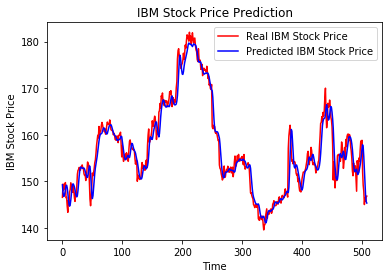

In [23]:
# plotting predicted values against actual values
plt.plot(test_X, color = 'red', label = 'Real IBM Stock Price')
plt.plot(predicted_ibm_stock, color = 'blue', label = 'Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

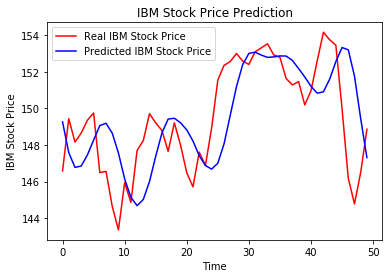

In [24]:
# plotting only for first 50 values
plt.plot(test_X[0:50], color = 'red', label = 'Real IBM Stock Price')
plt.plot(predicted_ibm_stock[0:50], color = 'blue', label = 'Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()